In [1]:
import pandas as pd
import yfinance as yf
import numpy as np
from pandas.tseries.offsets import MonthBegin
import ta

In [2]:
df=yf.download('AAPL',start='2015-01-01',end='2021-12-31')
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-12-31,28.205000,28.282499,27.552500,27.594999,24.839493,165613600
2015-01-02,27.847500,27.860001,26.837500,27.332500,24.603201,212818400
2015-01-05,27.072500,27.162500,26.352501,26.562500,23.910091,257142000
2015-01-06,26.635000,26.857500,26.157499,26.565001,23.912340,263188400
2015-01-07,26.799999,27.049999,26.674999,26.937500,24.247648,160423600
...,...,...,...,...,...,...
2021-12-23,175.850006,176.850006,175.270004,176.279999,175.262817,68356600
2021-12-27,177.089996,180.419998,177.070007,180.330002,179.289444,74919600
2021-12-28,180.160004,181.330002,178.529999,179.289993,178.255432,79144300


In [3]:
df.Close=df['Adj Close']
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-12-31,28.205000,28.282499,27.552500,24.839493,24.839493,165613600
2015-01-02,27.847500,27.860001,26.837500,24.603201,24.603201,212818400
2015-01-05,27.072500,27.162500,26.352501,23.910091,23.910091,257142000
2015-01-06,26.635000,26.857500,26.157499,23.912340,23.912340,263188400
2015-01-07,26.799999,27.049999,26.674999,24.247648,24.247648,160423600
...,...,...,...,...,...,...
2021-12-23,175.850006,176.850006,175.270004,175.262817,175.262817,68356600
2021-12-27,177.089996,180.419998,177.070007,179.289444,179.289444,74919600
2021-12-28,180.160004,181.330002,178.529999,178.255432,178.255432,79144300


In [4]:
def applyindicators(df):
    df['SMA_200'] = df.Close.rolling(200).mean()
    df['SMA_20'] = df.Close.rolling(20).mean()
    df['stddev'] = df.Close.rolling(20).std()
    df['Upper']=df.SMA_20+2.5*df.stddev
    df['Lower']=df.SMA_20-2.5*df.stddev
    df['rsi']=ta.momentum.rsi(df.Close,2)

In [5]:
applyindicators(df)

In [6]:
df

,Open,High,Low,Close,Adj Close,Volume,SMA_200,SMA_20,stddev,Upper,Lower,rsi
Date,,,,,,,,,,,,
2014-12-31,28.205000,28.282499,27.552500,24.839493,24.839493,165613600,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-02,27.847500,27.860001,26.837500,24.603201,24.603201,212818400,NaN,NaN,NaN,NaN,NaN,0.000000
2015-01-05,27.072500,27.162500,26.352501,23.910091,23.910091,257142000,NaN,NaN,NaN,NaN,NaN,0.000000
2015-01-06,26.635000,26.857500,26.157499,23.912340,23.912340,263188400,NaN,NaN,NaN,NaN,NaN,0.551335
2015-01-07,26.799999,27.049999,26.674999,24.247648,24.247648,160423600,NaN,NaN,NaN,NaN,NaN,62.389384
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-23,175.850006,176.850006,175.270004,175.262817,175.262817,68356600,141.428068,169.304393,6.477951,185.499270,153.109516,85.401142
2021-12-27,177.089996,180.419998,177.070007,179.289444,179.289444,74919600,141.725650,170.473608,6.026841,185.540710,155.406505,95.723343
2021-12-28,180.160004,181.330002,178.529999,178.255432,178.255432,79144300,142.003415,171.420611,5.658006,185.565626,157.275596,70.222960


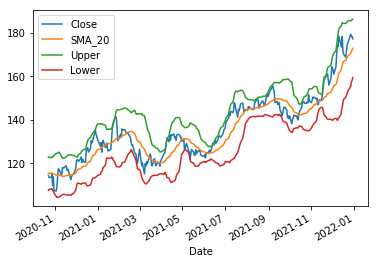

In [7]:
df.tail(300)[['Close','SMA_20','Upper','Lower']].plot()

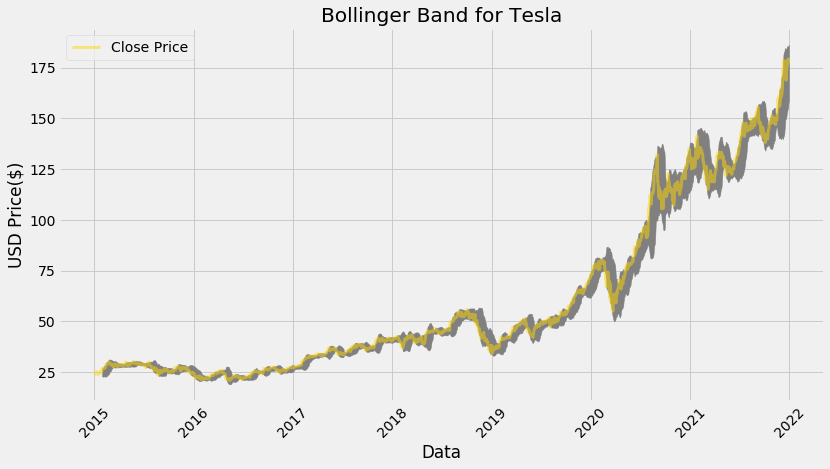

In [8]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
fig=plt.figure(figsize=(12.2,6.4))
ax=fig.add_subplot(1,1,1)#number of row,number of column ,number of index
x_axis=np.array(df.index)
ax.fill_between(x_axis,df['Upper'],df['Lower'],color='gray')
#plot the closing price and moving Average 
ax.plot(x_axis,np.array(df['Close']),color='Gold',lw=3,label='Close Price',alpha=0.5)#lw=line width
ax.set_title('Bollinger Band for Tesla')
ax.set_xlabel('Data')
ax.set_ylabel('USD Price($)')
plt.xticks(rotation=45)
ax.legend()
plt.show()

In [9]:
def conditions(df):
    df['Buy']=np.where((df.Close>df.SMA_200)&(df.Close<df.Lower)&(0.97*df.Close>=df.Low.shift(-1)),1,0)
    df['Sell']=np.where((df.rsi>50),1,0)
    df['Buyprice']=0.97*df.Close
    df['Sellprice']=df.Open.shift(-1)

In [10]:
conditions(df)

In [11]:
df

,Open,High,Low,Close,Adj Close,Volume,SMA_200,SMA_20,stddev,Upper,Lower,rsi,Buy,Sell,Buyprice,Sellprice
Date,,,,,,,,,,,,,,,,
2014-12-31,28.205000,28.282499,27.552500,24.839493,24.839493,165613600,NaN,NaN,NaN,NaN,NaN,NaN,0,0,24.094308,27.847500
2015-01-02,27.847500,27.860001,26.837500,24.603201,24.603201,212818400,NaN,NaN,NaN,NaN,NaN,0.000000,0,0,23.865105,27.072500
2015-01-05,27.072500,27.162500,26.352501,23.910091,23.910091,257142000,NaN,NaN,NaN,NaN,NaN,0.000000,0,0,23.192789,26.635000
2015-01-06,26.635000,26.857500,26.157499,23.912340,23.912340,263188400,NaN,NaN,NaN,NaN,NaN,0.551335,0,0,23.194970,26.799999
2015-01-07,26.799999,27.049999,26.674999,24.247648,24.247648,160423600,NaN,NaN,NaN,NaN,NaN,62.389384,0,1,23.520219,27.307501
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-23,175.850006,176.850006,175.270004,175.262817,175.262817,68356600,141.428068,169.304393,6.477951,185.499270,153.109516,85.401142,0,1,170.004933,177.089996
2021-12-27,177.089996,180.419998,177.070007,179.289444,179.289444,74919600,141.725650,170.473608,6.026841,185.540710,155.406505,95.723343,0,1,173.910761,180.160004
2021-12-28,180.160004,181.330002,178.529999,178.255432,178.255432,79144300,142.003415,171.420611,5.658006,185.565626,157.275596,70.222960,0,1,172.907769,179.330002


In [12]:
Buy_sells=df[(df.Buy==1)|(df.Sell==1)]

In [13]:
Buy_sells

,Open,High,Low,Close,Adj Close,Volume,SMA_200,SMA_20,stddev,Upper,Lower,rsi,Buy,Sell,Buyprice,Sellprice
Date,,,,,,,,,,,,,,,,
2015-01-07,26.799999,27.049999,26.674999,24.247648,24.247648,160423600,NaN,NaN,NaN,NaN,NaN,62.389384,0,1,23.520219,27.307501
2015-01-08,27.307501,28.037500,27.174999,25.179296,25.179296,237458000,NaN,NaN,NaN,NaN,NaN,91.558366,0,1,24.423918,28.167500
2015-01-09,28.167500,28.312500,27.552500,25.206306,25.206306,214798000,NaN,NaN,NaN,NaN,NaN,91.921642,0,1,24.450117,28.150000
2015-01-13,27.857500,28.200001,27.227501,24.803488,24.803488,268367600,NaN,NaN,NaN,NaN,NaN,52.864949,0,1,24.059383,27.260000
2015-01-20,26.959999,27.242500,26.625000,24.465931,24.465931,199599600,NaN,NaN,NaN,NaN,NaN,68.490396,0,1,23.731953,27.237499
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-22,173.039993,175.860001,172.149994,174.626495,174.626495,92135300,141.155221,168.591531,6.571539,185.020378,152.162684,81.960907,0,1,169.387701,175.850006
2021-12-23,175.850006,176.850006,175.270004,175.262817,175.262817,68356600,141.428068,169.304393,6.477951,185.499270,153.109516,85.401142,0,1,170.004933,177.089996
2021-12-27,177.089996,180.419998,177.070007,179.289444,179.289444,74919600,141.725650,170.473608,6.026841,185.540710,155.406505,95.723343,0,1,173.910761,180.160004


In [14]:
Buy_sells

,Open,High,Low,Close,Adj Close,Volume,SMA_200,SMA_20,stddev,Upper,Lower,rsi,Buy,Sell,Buyprice,Sellprice
Date,,,,,,,,,,,,,,,,
2015-01-07,26.799999,27.049999,26.674999,24.247648,24.247648,160423600,NaN,NaN,NaN,NaN,NaN,62.389384,0,1,23.520219,27.307501
2015-01-08,27.307501,28.037500,27.174999,25.179296,25.179296,237458000,NaN,NaN,NaN,NaN,NaN,91.558366,0,1,24.423918,28.167500
2015-01-09,28.167500,28.312500,27.552500,25.206306,25.206306,214798000,NaN,NaN,NaN,NaN,NaN,91.921642,0,1,24.450117,28.150000
2015-01-13,27.857500,28.200001,27.227501,24.803488,24.803488,268367600,NaN,NaN,NaN,NaN,NaN,52.864949,0,1,24.059383,27.260000
2015-01-20,26.959999,27.242500,26.625000,24.465931,24.465931,199599600,NaN,NaN,NaN,NaN,NaN,68.490396,0,1,23.731953,27.237499
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-22,173.039993,175.860001,172.149994,174.626495,174.626495,92135300,141.155221,168.591531,6.571539,185.020378,152.162684,81.960907,0,1,169.387701,175.850006
2021-12-23,175.850006,176.850006,175.270004,175.262817,175.262817,68356600,141.428068,169.304393,6.477951,185.499270,153.109516,85.401142,0,1,170.004933,177.089996
2021-12-27,177.089996,180.419998,177.070007,179.289444,179.289444,74919600,141.725650,170.473608,6.026841,185.540710,155.406505,95.723343,0,1,173.910761,180.160004


In [15]:
matched=Buy_sells[(Buy_sells.Buy.diff()==1)|(Buy_sells.Sell.diff()==1)]
matched

,Open,High,Low,Close,Adj Close,Volume,SMA_200,SMA_20,stddev,Upper,Lower,rsi,Buy,Sell,Buyprice,Sellprice
Date,,,,,,,,,,,,,,,,
2020-02-27,70.275002,71.500000,68.239998,67.149338,67.149338,320605600,58.987776,76.960077,3.572764,85.891988,68.028166,8.931175,1,0,65.134858,64.315002
2020-03-02,70.570000,75.360001,69.430000,73.358047,73.358047,341397200,59.228430,76.227130,4.198173,86.722563,65.731697,80.994153,0,1,71.157306,75.917503


In [16]:
profit=(matched.Sellprice.shift(-1)-matched.Buyprice)/matched.Buyprice

In [17]:
profit

Date
2020-02-27    0.165543
2020-03-02         NaN
dtype: float64